# TFM - Predicción potenciales compradores de un ecommerce

Evolución del notebook *Modelo_1.ipynb* unicamente aplicando a **Altas**

------------------------------------

------------------

### 1.1 Librerias

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ParameterGrid

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, RUSBoostClassifier, EasyEnsembleClassifier

from collections import Counter

pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings("ignore")

------------------

### 1.2 Variables globales

In [29]:
LABELS = ["No_Alta","Alta"]

------------------

### 1.3 Funciones

In [30]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize = (8, 8))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

------------------------------------

------------------

A continuación comenzamos leyendo los ficheros que hemos tratado, limpiado y analizado en los procesos anteriores.

Se realizará un análisis sencillo de la estructura y una visualización de varias muestras. 

Además someteremos las variables categóricas a variables *dummies*, de forma que que podamos introducirlas ennuestro modelo.

### 2.1 Lectura de Fichero

In [31]:
df = pd.read_csv('Data/dataset_model_corr.txt', sep = ';', encoding = 'ISO-8859-1')

In [32]:
df.shape

(406267, 26)

In [33]:
df.head(3)

,TIPOUSUARIO,FECHA_REGISTRO_WEEKDAY,FECHA_REGISTRO_MONTH,CANAL_REGISTRO,TIPOEMAIL,BONDAD_EMAIL,TIPO_TELF,IP_CONTINENTE,IP_COUNTRY_PIB,USU_TIPO,USU_TAMANIO,USU_ESTADO,USU_SECTOR_ECONOMICO,1A_DESCGRUPOPROD,1A_EMPCONSUL_EST,1A_EMPCONSUL_SECTOR,IPCASOS,IP_COUNTRY_IDH_NUM,USU_DEPART_DEN_POB,USU_DEPART_IDH,1A_EMPCONSUL_PROV_DENS,1A_EMPCONSUL_PROV_IDH,FICH_PROMO_TOT,PERF_PROMO_TOT,IND_ALTA,IND_CLIENTE
0,PF,1,10,3,GOOHOTYAHMAIL,0,NO_PUBLICO,AMERICA_SUR,Ingreso mediano alto,NoApl,NoApl,NoApl,NoApl,PERF_PROMO,ACTIVA,TERCIARIO,1,0.767,-1.00,-1.000,47.92,0.782,0,1,0,0
1,PJ,1,5,3,GOOHOTYAHMAIL,1,NO_PUBLICO,AMERICA_SUR,Ingreso mediano alto,SOC_COMERCIAL_INDUSTRIAL,PQ,ACTIVA,TERCIARIO,PERF_PROMO,ACTIVA,SD,1,0.767,306.38,0.832,47.92,0.782,0,1,0,0
2,PJ,2,9,7,GOOHOTYAHMAIL,1,NO_PUBLICO,AMERICA_SUR,Ingreso mediano alto,SOC_COMERCIAL_INDUSTRIAL,MC,ACTIVA,TERCIARIO,PERF_PROMO,ACTIVA,TERCIARIO,1,0.767,815.17,0.835,4438.75,0.904,0,1,0,0


------------------

### 2.2 Variables dummies

In [34]:
ohe_columns = ['TIPOUSUARIO','FECHA_REGISTRO_WEEKDAY','FECHA_REGISTRO_MONTH','CANAL_REGISTRO','TIPOEMAIL','TIPO_TELF','IP_CONTINENTE','IP_COUNTRY_PIB','USU_TIPO',
               'USU_TAMANIO','USU_ESTADO','USU_SECTOR_ECONOMICO','1A_DESCGRUPOPROD','1A_EMPCONSUL_EST','1A_EMPCONSUL_SECTOR']

In [35]:
final_df = pd.get_dummies(df, columns = ohe_columns)

**Columnas para la predicción**

In [36]:
columnas = ['TIPOUSUARIO_PF','TIPOUSUARIO_PJ', 'FECHA_REGISTRO_WEEKDAY_0','FECHA_REGISTRO_WEEKDAY_1', 'FECHA_REGISTRO_WEEKDAY_2','FECHA_REGISTRO_WEEKDAY_3', 
            'FECHA_REGISTRO_WEEKDAY_4','FECHA_REGISTRO_WEEKDAY_5', 'FECHA_REGISTRO_WEEKDAY_6','FECHA_REGISTRO_MONTH_1', 'FECHA_REGISTRO_MONTH_2',
            'FECHA_REGISTRO_MONTH_3', 'FECHA_REGISTRO_MONTH_4','FECHA_REGISTRO_MONTH_5', 'FECHA_REGISTRO_MONTH_6','FECHA_REGISTRO_MONTH_7', 'FECHA_REGISTRO_MONTH_8',
            'FECHA_REGISTRO_MONTH_9', 'FECHA_REGISTRO_MONTH_10','FECHA_REGISTRO_MONTH_11', 'FECHA_REGISTRO_MONTH_12','CANAL_REGISTRO_1', 'CANAL_REGISTRO_2', 'CANAL_REGISTRO_3',
            'CANAL_REGISTRO_4', 'CANAL_REGISTRO_5', 'CANAL_REGISTRO_6', 'CANAL_REGISTRO_7', 'CANAL_REGISTRO_8', 'CANAL_REGISTRO_9','TIPOEMAIL_ADMINISTRACION','TIPOEMAIL_CORPORATIVO',
            'TIPOEMAIL_DOCENTE','TIPOEMAIL_GOOHOTYAHMAIL','TIPOEMAIL_SINCLASIFICAR','TIPOEMAIL_TEMPORAL','BONDAD_EMAIL','IPCASOS','TIPO_TELF_EXTRANJERO',
            'TIPO_TELF_MOVIL', 'TIPO_TELF_NO_PUBLICO','IP_CONTINENTE_AFRICA','IP_CONTINENTE_AMERICA_NORTE','IP_CONTINENTE_AMERICA_SUR','IP_CONTINENTE_ASIA','IP_CONTINENTE_EUROPA',
            'IP_CONTINENTE_NI','IP_CONTINENTE_OCEANNIA', 'IP_COUNTRY_PIB_Ingreso alto','IP_COUNTRY_PIB_Ingreso mediano alto','IP_COUNTRY_PIB_NI',
            'IP_COUNTRY_PIB_Países de ingreso mediano bajo','IP_COUNTRY_IDH_NUM', 'USU_TIPO_EMPRESARIO INDIVIDUAL','USU_TIPO_ENTIDAD_HOLDING','USU_TIPO_NI','USU_TIPO_NoApl',
            'USU_TIPO_SOC_COMERCIAL_INDUSTRIAL','USU_TIPO_SOC_NO_COMERCIAL','USU_TAMANIO_GR', 'USU_TAMANIO_MC','USU_TAMANIO_MD','USU_TAMANIO_NoApl','USU_TAMANIO_PQ',
            'USU_TAMANIO_SD','USU_ESTADO_ACTIVA','USU_ESTADO_INACTIVA','USU_ESTADO_NoApl', 'USU_ESTADO_REESTRUCTURACION','USU_ESTADO_RELACION_CLINTON','USU_ESTADO_SD',
            'USU_SECTOR_ECONOMICO_CUATERNARIO','USU_SECTOR_ECONOMICO_NoApl', 'USU_SECTOR_ECONOMICO_PRIMARIO','USU_SECTOR_ECONOMICO_QUINARIO','USU_SECTOR_ECONOMICO_SD',
            'USU_SECTOR_ECONOMICO_SECUNDARIO','USU_SECTOR_ECONOMICO_TERCIARIO', 'USU_DEPART_DEN_POB','USU_DEPART_IDH','FICH_PROMO_TOT','PERF_PROMO_TOT','1A_EMPCONSUL_EST_ACTIVA', 
            '1A_EMPCONSUL_EST_INACTIVA', '1A_DESCGRUPOPROD_FICH_PROMO', '1A_DESCGRUPOPROD_PERF_PROMO', '1A_DESCGRUPOPROD_RES_PAGO', '1A_EMPCONSUL_EST_NI', 
            '1A_EMPCONSUL_EST_REESTRUCTURACION', '1A_EMPCONSUL_EST_RELACION_CLINTON', '1A_EMPCONSUL_SECTOR_CUATERNARIO', '1A_EMPCONSUL_SECTOR_PRIMARIO', '1A_EMPCONSUL_SECTOR_QUINARIO',
            '1A_EMPCONSUL_SECTOR_SD', '1A_EMPCONSUL_SECTOR_SECUNDARIO', '1A_EMPCONSUL_SECTOR_TERCIARIO']

-----------------

------------------

### 3.1 Analisis desbalanceo

In [37]:
final_df.shape

(406267, 100)

In [38]:
pd.value_counts(final_df['IND_ALTA'], sort = True)

0    393608
1     12659
Name: IND_ALTA, dtype: int64

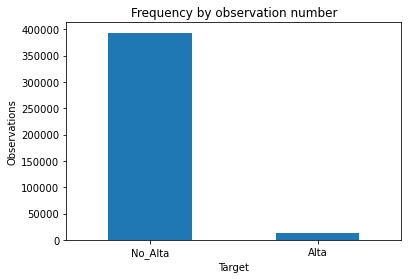

In [39]:
count_classes = pd.value_counts(final_df['IND_ALTA'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Target")
plt.ylabel("Observations");

In [40]:
print('Los clientes suponen un % del total: ', (12659/final_df.shape[0])*100)

Los clientes suponen un % del total:  3.1159311487273147


**Podemos ver un claro desbalanceo donde los clientes no suponen más del 3% de las observaciones**

------------------

------------------

### 4. Creación del Modelo

#### 4.1 Dividimos el set entre features y label

In [41]:
features = final_df[columnas]
labels = final_df['IND_ALTA']

In [42]:
features.shape

(406267, 96)

In [43]:
labels.shape

(406267,)

------------------

#### 4.2 Creamos set de entrenamiento y test

In [44]:
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size = 0.3, random_state = 123)

In [45]:
train_x.shape

(284386, 96)

In [46]:
test_x.shape

(121881, 96)

In [47]:
train_y.shape

(284386,)

In [48]:
test_y.shape

(121881,)

------------------

#### 4.3 Selección Hiperparámetros

Definimos una serie de hiperparámetros diferentes para comparar resultados

In [49]:
param_grid = ParameterGrid({'n_estimators': [5, 20, 50, 100, 150],
                            'max_features': [5, 'log2', 'auto', 'sqrt'],
                            'max_depth'   : [None, 3, 5, 7, 10],
                            'criterion'   : ['gini', 'entropy']
                           })

Loop para ajustar un modelo con cada combinación de hiperparámetros

In [50]:
resultados = {'params': [], 'oob_accuracy': []}

In [51]:
for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(train_x, train_y)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 5} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 20} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 50} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 5} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 20} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 50} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 

In [52]:
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados.head(10)

,oob_accuracy,criterion,max_depth,max_features,n_estimators
14,0.993600,gini,NaN,auto,150
19,0.993600,gini,NaN,sqrt,150
4,0.993558,gini,NaN,5,150
104,0.993555,entropy,NaN,5,150
119,0.993551,entropy,NaN,sqrt,150
114,0.993551,entropy,NaN,auto,150
109,0.993537,entropy,NaN,log2,150
9,0.993530,gini,NaN,log2,150
113,0.993495,entropy,NaN,auto,100
118,0.993495,entropy,NaN,sqrt,100


**Seleccionamos los mejores hiperparámetros**

In [53]:
print("Mejores hiperparámetros encontrados (oob-accuracy)")
print('--------------------------------------------------')
print("Estimators: \n", resultados.iloc[0,:], "accuracy")

Mejores hiperparámetros encontrados (oob-accuracy)
--------------------------------------------------
Estimators: 
 oob_accuracy    0.9936
criterion         gini
max_depth          NaN
max_features      auto
n_estimators       150
Name: 14, dtype: object accuracy


--------------

--------------

#### 4.4 Modelo 1 - Baseline

Nuestro modelo Base, tendrá los parámetros obtenidos como mejores anteriormente.

**Aplicamos los mejores hiperparámetros obtenidos**

In [54]:
rf = RandomForestClassifier(criterion = 'gini', 
                            n_estimators = 150, 
                            max_features = 'auto', 
                            max_depth = None, 
                            n_jobs = -1,
                            random_state = 123)

rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=123)

Observamos los resultados del modelo

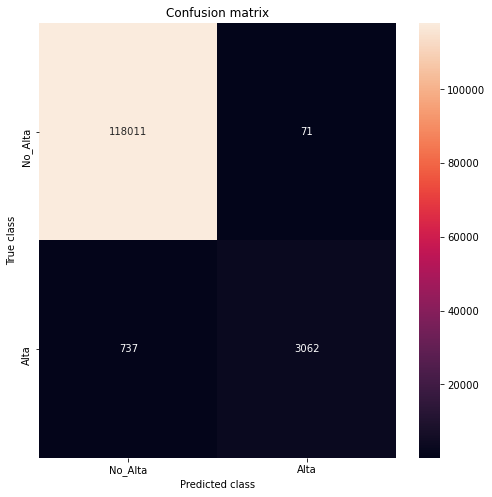

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    118082
           1       0.98      0.81      0.88      3799

    accuracy                           0.99    121881
   macro avg       0.99      0.90      0.94    121881
weighted avg       0.99      0.99      0.99    121881



In [55]:
pred_y = rf.predict(test_x)
mostrar_resultados(test_y, pred_y)

In [56]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = train_x.columns, columns = ['important']).sort_values(['important'], ascending = 0)

In [57]:
feature_importances[feature_importances['important'] > 0.01]*100

,important
FICH_PROMO_TOT,24.919401
IPCASOS,8.057881
PERF_PROMO_TOT,3.773835
CANAL_REGISTRO_1,2.573828
USU_DEPART_DEN_POB,1.892018
USU_DEPART_IDH,1.880129
TIPOEMAIL_GOOHOTYAHMAIL,1.553897
1A_DESCGRUPOPROD_FICH_PROMO,1.511652
1A_EMPCONSUL_SECTOR_TERCIARIO,1.467466
1A_DESCGRUPOPROD_PERF_PROMO,1.464135


In [58]:
feature_importances[feature_importances['important'] > 0.01].shape

(26, 1)

------

------

------

#### 4.5 Modelo - Aplicando técnicas sobre el desbalanceo

**Estrategias para el manejo de Datos Desbalanceados**

##### **4.5.1 Penalización para compensar**

In [59]:
rf = RandomForestClassifier(criterion = 'gini', 
                            n_estimators = 150, 
                            max_features = 'auto', 
                            max_depth = None,
                            n_jobs = -1,
                            random_state = 123,
                            class_weight = 'balanced')

rf.fit(train_x, train_y)

RandomForestClassifier(class_weight='balanced', n_estimators=150, n_jobs=-1,
                       random_state=123)

Observamos los resultados del modelo

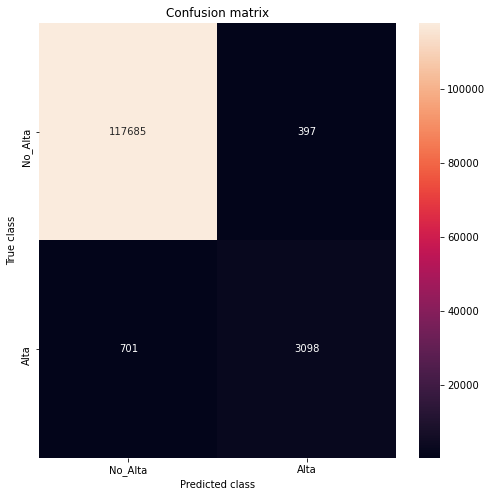

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    118082
           1       0.89      0.82      0.85      3799

    accuracy                           0.99    121881
   macro avg       0.94      0.91      0.92    121881
weighted avg       0.99      0.99      0.99    121881



In [60]:
pred_y = rf.predict(test_x)
mostrar_resultados(test_y, pred_y)

In [61]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = train_x.columns, columns = ['important']).sort_values(['important'], ascending = 0)

In [62]:
feature_importances[feature_importances['important'] > 0.01]*100

,important
FICH_PROMO_TOT,26.616307
IPCASOS,7.786963
PERF_PROMO_TOT,3.303452
BONDAD_EMAIL,3.062237
USU_DEPART_IDH,3.035183
USU_DEPART_DEN_POB,2.525485
CANAL_REGISTRO_1,1.666788
IP_COUNTRY_IDH_NUM,1.659378
IP_CONTINENTE_AMERICA_SUR,1.538582
1A_DESCGRUPOPROD_PERF_PROMO,1.335845


In [63]:
feature_importances[feature_importances['important'] > 0.01].shape

(24, 1)

------

##### **4.5.2 Subsampling en la clase mayoritaria**

**RandomUnderSampler**

In [64]:
us = RandomUnderSampler(sampling_strategy = 'majority', random_state = 123)
X_train_res, y_train_res = us.fit_resample(train_x, train_y)
 
print ("Distribution before resampling {}".format(Counter(train_y)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 275526, 1: 8860})
Distribution after resampling Counter({0: 8860, 1: 8860})


In [65]:
rf = RandomForestClassifier(criterion = 'gini', 
                            n_estimators = 150, 
                            max_features = 'auto', 
                            max_depth = None, 
                            n_jobs = -1,
                            random_state = 123)

rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=123)

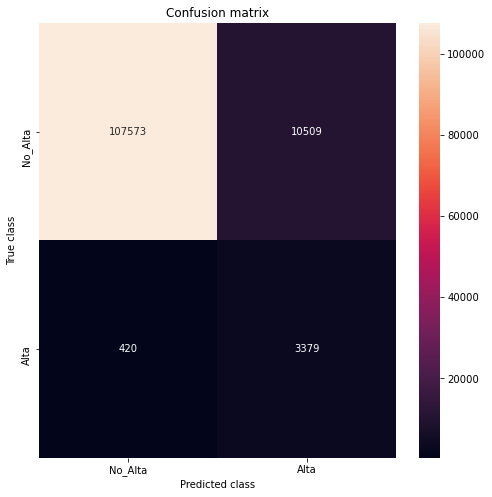

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    118082
           1       0.24      0.89      0.38      3799

    accuracy                           0.91    121881
   macro avg       0.62      0.90      0.67    121881
weighted avg       0.97      0.91      0.93    121881



In [66]:
pred_y = rf.predict(test_x)
mostrar_resultados(test_y, pred_y)

In [67]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = train_x.columns, columns = ['important']).sort_values(['important'], ascending = 0)

In [68]:
feature_importances[feature_importances['important'] > 0.01]*100

,important
FICH_PROMO_TOT,26.029359
IPCASOS,6.820612
PERF_PROMO_TOT,3.280370
BONDAD_EMAIL,3.138577
USU_DEPART_IDH,3.092194
USU_DEPART_DEN_POB,2.153162
IP_COUNTRY_PIB_Ingreso mediano alto,1.944913
IP_CONTINENTE_AMERICA_SUR,1.723226
IP_COUNTRY_IDH_NUM,1.614892
CANAL_REGISTRO_1,1.498246


In [69]:
feature_importances[feature_importances['important'] > 0.01].shape

(24, 1)

------

##### **4.5.3 Oversampling en la clase minoritaria**

**SMOTE**

In [70]:
os =  SMOTE(sampling_strategy = 'minority')
X_train_res, y_train_res = os.fit_resample(train_x, train_y)

In [71]:
print ("Distribution before resampling {}".format(Counter(train_y)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 275526, 1: 8860})
Distribution labels after resampling Counter({1: 275526, 0: 275526})


In [72]:
rf = RandomForestClassifier(criterion = 'gini', 
                            n_estimators = 150, 
                            max_features = 'auto', 
                            max_depth = None, 
                            n_jobs = -1,
                            random_state = 123)

rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=123)

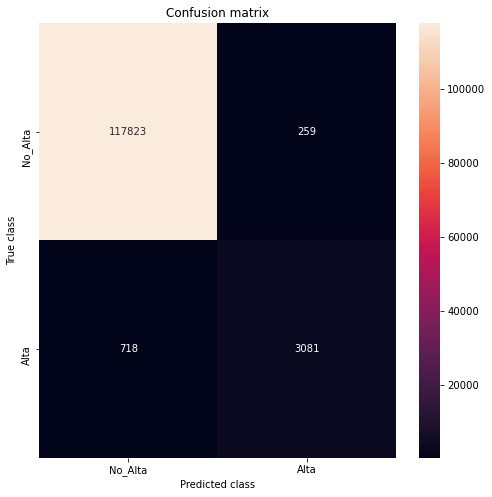

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    118082
           1       0.92      0.81      0.86      3799

    accuracy                           0.99    121881
   macro avg       0.96      0.90      0.93    121881
weighted avg       0.99      0.99      0.99    121881



In [73]:
pred_y = rf.predict(test_x)
mostrar_resultados(test_y, pred_y)

In [74]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = train_x.columns, columns = ['important']).sort_values(['important'], ascending = 0)

In [75]:
feature_importances[feature_importances['important'] > 0.01]*100

,important
FICH_PROMO_TOT,23.686781
IPCASOS,6.878355
USU_DEPART_IDH,2.936908
USU_DEPART_DEN_POB,2.792830
PERF_PROMO_TOT,2.750953
CANAL_REGISTRO_3,2.404603
BONDAD_EMAIL,2.379730
IP_COUNTRY_IDH_NUM,2.042797
IP_CONTINENTE_AMERICA_SUR,1.671094
1A_DESCGRUPOPROD_PERF_PROMO,1.646327


In [76]:
feature_importances[feature_importances['important'] > 0.01].shape

(26, 1)

------

##### **4.5.4 Combinamos OverSampling con Subsampling**

**Combinando SMOTE & RandomUnderSampler**

In [77]:
over = SMOTE(sampling_strategy = 0.3)
under = RandomUnderSampler(sampling_strategy = 0.5)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps = steps)

In [78]:
X_train_res, y_train_res = pipeline.fit_resample(train_x, train_y)

In [79]:
print ("Distribution before resampling {}".format(Counter(train_y)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 275526, 1: 8860})
Distribution after resampling Counter({0: 165314, 1: 82657})


In [80]:
rf = RandomForestClassifier(criterion = 'gini', 
                            n_estimators = 150, 
                            max_features = 'auto', 
                            max_depth = None,  
                            n_jobs = -1,
                            random_state = 123)

rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=123)

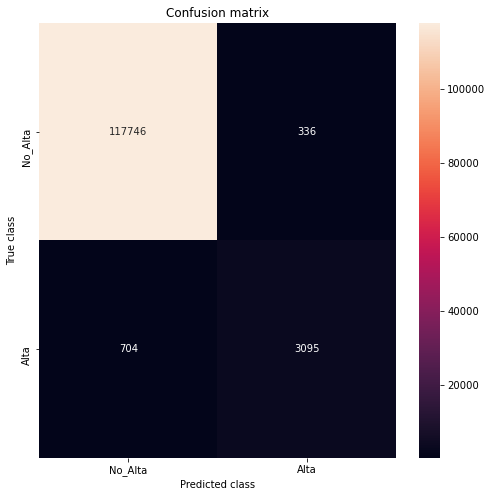

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    118082
           1       0.90      0.81      0.86      3799

    accuracy                           0.99    121881
   macro avg       0.95      0.91      0.93    121881
weighted avg       0.99      0.99      0.99    121881



In [81]:
pred_y = rf.predict(test_x)
mostrar_resultados(test_y, pred_y)

In [82]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = train_x.columns, columns = ['important']).sort_values(['important'], ascending = 0)

In [83]:
feature_importances[feature_importances['important'] > 0.01] * 100

,important
FICH_PROMO_TOT,23.648104
IPCASOS,7.477456
PERF_PROMO_TOT,2.937111
USU_DEPART_IDH,2.676724
USU_DEPART_DEN_POB,2.576824
IP_COUNTRY_IDH_NUM,2.245454
BONDAD_EMAIL,2.142825
CANAL_REGISTRO_3,2.050141
1A_DESCGRUPOPROD_PERF_PROMO,1.686038
1A_DESCGRUPOPROD_FICH_PROMO,1.685866


In [84]:
feature_importances[feature_importances['important'] > 0.01].shape

(23, 1)

------

**SMOTETomek**

In [85]:
os_us = SMOTETomek(sampling_strategy = 'all')
X_train_res, y_train_res = os_us.fit_resample(train_x, train_y)

In [86]:
print ("Distribution before resampling {}".format(Counter(train_y)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 275526, 1: 8860})
Distribution after resampling Counter({1: 275517, 0: 275517})


In [87]:
rf = RandomForestClassifier(criterion = 'gini', 
                            n_estimators = 150, 
                            max_features = 'auto', 
                            max_depth = None,  
                            n_jobs = -1,
                            random_state = 123)

rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=123)

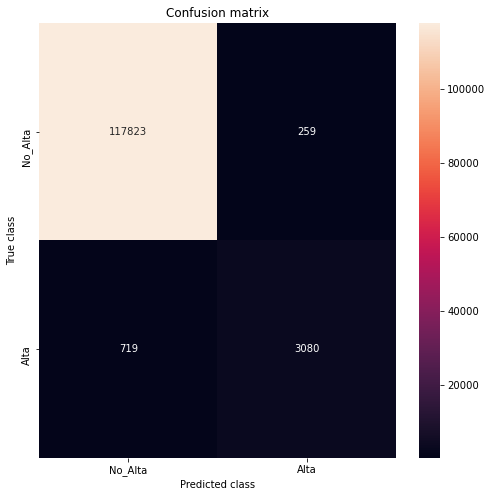

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    118082
           1       0.92      0.81      0.86      3799

    accuracy                           0.99    121881
   macro avg       0.96      0.90      0.93    121881
weighted avg       0.99      0.99      0.99    121881



In [88]:
pred_y = rf.predict(test_x)
mostrar_resultados(test_y, pred_y)

In [89]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = train_x.columns, columns = ['important']).sort_values(['important'], ascending = 0)

In [90]:
feature_importances[feature_importances['important'] > 0.01] * 100

,important
FICH_PROMO_TOT,23.576561
IPCASOS,6.889000
USU_DEPART_IDH,2.810625
USU_DEPART_DEN_POB,2.646802
PERF_PROMO_TOT,2.642730
CANAL_REGISTRO_3,2.351327
BONDAD_EMAIL,2.302365
IP_COUNTRY_IDH_NUM,1.800671
USU_TIPO_EMPRESARIO INDIVIDUAL,1.749064
IP_CONTINENTE_AMERICA_SUR,1.718592


In [91]:
feature_importances[feature_importances['important'] > 0.01].shape

(27, 1)

------

------

##### **4.5.5 Ensamble de Modelos con Balanceo**

Para esta estrategia usaremos un Clasificador de Ensamble que utiliza Bagging y el modelo será un RandomForest.

**Bagging**

In [92]:
bbc = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion = 'gini', 
                                                                        n_estimators = 150, 
                                                                        max_features = 'auto', 
                                                                        max_depth = None, 
                                                                        n_jobs = -1,
                                                                        random_state = 123),
                                sampling_strategy = 'all',
                                n_estimators = 20,
                                replacement = False,
                                random_state = 123)

bbc.fit(train_x, train_y)

BalancedBaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=150,
                                                                n_jobs=-1,
                                                                random_state=123),
                          n_estimators=20, random_state=123,
                          sampling_strategy='all')

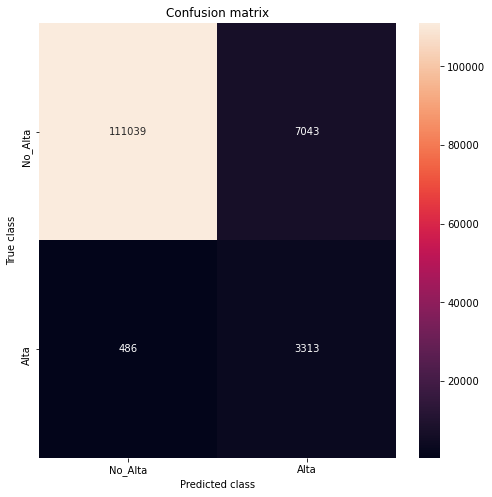

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    118082
           1       0.32      0.87      0.47      3799

    accuracy                           0.94    121881
   macro avg       0.66      0.91      0.72    121881
weighted avg       0.97      0.94      0.95    121881



In [93]:
pred_y = bbc.predict(test_x)
mostrar_resultados(test_y, pred_y)

------

**RUSBoostClassifier**

In [94]:
RUS = RUSBoostClassifier(base_estimator = RandomForestClassifier(criterion = 'gini', 
                                                                 n_estimators = 150, 
                                                                 max_features = 'auto', 
                                                                 max_depth = None,
                                                                 n_jobs = -1,
                                                                 random_state = 123),
                                sampling_strategy = 'majority',
                                n_estimators = 20,
                                replacement = False,
                                random_state = 123)

RUS.fit(train_x, train_y)

RUSBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=150,
                                                         n_jobs=-1,
                                                         random_state=123),
                   n_estimators=20, random_state=123,
                   sampling_strategy='majority')

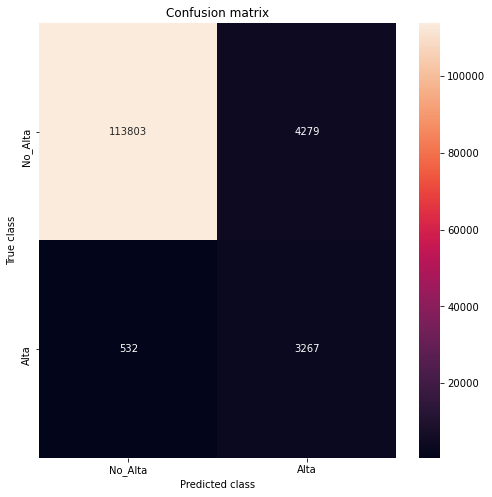

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    118082
           1       0.43      0.86      0.58      3799

    accuracy                           0.96    121881
   macro avg       0.71      0.91      0.78    121881
weighted avg       0.98      0.96      0.97    121881



In [95]:
pred_y = RUS.predict(test_x)
mostrar_resultados(test_y, pred_y)

---------------

---------------

---------------

# CONCLUSIONES

| Modelo | Accuracy  | NoAltas - Precision  | NoAltas - Recall  | NoAltas F1-score | Altas - Precision | Altas - Recall | Altas F1-score | # Variables utilizadas
|---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Baseline | 0.99 | 0.99 | 1.00 | **1.00** | 0.98 | 0.81 | **0.88** | 26 |  

### **Resultados** 

| Modelo |Tecnica |Algoritmo   | Accuracy  | NoAltas - Precision  | NoAltas - Recall  | NoAltas F1-score | Altas - Precision | Altas - Recall | Altas F1-score | # Variables utilizadas
|---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Modelo 1 | **Penalización para compensar** | -- | 0.99 | 0.99 | 1.00 | **1.00** | 0.89 | 0.82 | **0.85** | 24 |
| Modelo 2 | **Subsampling en la clase mayoritaria** | RandomUnderSampler | 0.91 | 1.00 | 0.91 | **0.95** | 0.24 | 0.89 | **0.38** | 24 |
| Modelo 3 | **Oversampling en la clase minoritaria** | SMOTE| 0.99 | 0.99 | 1.00 | **1.00** | 0.92 | 0.81 | **0.86** | 26 |
| Modelo 4 | **Combinamos OverSampling con Subsampling** | SMOTE & RandomUnderSampler | 0.99 | 0.99 | 1.00 | **1.00** | 0.9 | 0.81 | **0.86** | 23 |
| Modelo 5 | **Combinamos OverSampling con Subsampling** | SMOTE-Tomek| 0.99 | 0.99 | 1.00 | **1.00** | 0.92 | 0.81 | **0.86** | 27 |
| Modelo 6 | **Ensamble de Modelos con Balanceo** | BalancedBaggingClassifier| 0.94 | 1.00 | 0.94 | **0.97** | 0.32 | 0.87 | **0.47**  | -- |
| Modelo 7 | **Ensamble de Modelos con Balanceo** | RUSBoostClassifier| 0.96 | 1.00 | 0.96 | **0.98** | 0.43 | 0.86 | **0.58** | -- |

Tras los resultados obtenidos y expuestos, podemos concluir que las técnicas que mejores resultados nos han proporcionado estan entre **Penalización para compensar**, **Oversampling en la clase minoritaria** y **Combinamos OverSampling con Subsampling**, (SMOTE y SMOTE-Tomek respectivamente). Los resultados de las técnicas son muy parecidos al del modelo Base.

Análizando las diferentes métricas obtenidas, en primer lugar nos fijamos que todos las diferentes técnicas tienen un F1-score de la clase No Clientes muy similar entre ellas, por lo que marcará la diferencias será la clase Clientes.

Observando que el modelo base y las técnicas SMOTE y SMOTE-Tomek son los que mejor F1 en la clase clientes tienen, analizaremos en detalle la precisión y recall de cada uno.

Entendiendo que el objetivo del negocio es poder desarrollar una estrategia en base a un determinado grupo, lo que premiaremos es el modelo que mejor recall tenga, ya que lo que interesa es detectar bien la clase clientes. El modelo que mejor responde a esto es el que utiliza la técnica **penalizar para compensar**.